In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('illinois_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_cases_2_lag', 'new_cases_10_min', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_30_lag', 'current_intensive_care_patients', 'new_cases_150_lag', 'new_cases_7_lag', 'relative_humidity', 'new_deaths_100_std', 'new_deaths_1_lag', 'new_cases_1 lag', 'new_deaths_50_lag', 'new_cases_10_std', 'new_deaths_3_lag', 'new_cases_3_lag', 'new_deaths_7_lag', 'new_cases_10_mean', 'new_deaths_2_lag', 'dew_point', 'new_cases_50_std', 'new_deaths_4_lag', 'average_temperature_celsius', 'new_hospitalized_patients', 'new_cases_4_lag', 'new_cases_10_max']]
covid_test = covid_test[['y', 'new_cases_2_lag', 'new_cases_10_min', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_30_lag', 'current_intensive_care_patients', 'new_cases_150_lag', 'new_cases_7_lag', 'relative_humidity', 'new_deaths_100_std', 'new_deaths_1_lag', 'new_cases_1 lag', 'new_deaths_50_lag', 'new_cases_10_std', 'new_deaths_3_lag', 'new_cases_3_lag', 'new_deaths_7_lag', 'new_cases_10_mean', 'new_deaths_2_lag', 'dew_point', 'new_cases_50_std', 'new_deaths_4_lag', 'average_temperature_celsius', 'new_hospitalized_patients', 'new_cases_4_lag', 'new_cases_10_max']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:5282.37373	validation_1-rmse:18771.17026
[1]	validation_0-rmse:5237.80082	validation_1-rmse:18682.77964
[2]	validation_0-rmse:5193.67172	validation_1-rmse:18595.43180
[3]	validation_0-rmse:5149.98286	validation_1-rmse:18508.89278
[4]	validation_0-rmse:5106.73014	validation_1-rmse:18423.14945
[5]	validation_0-rmse:5063.88292	validation_1-rmse:18338.51373
[6]	validation_0-rmse:5021.45068	validation_1-rmse:18255.06240
[7]	validation_0-rmse:4979.45296	validation_1-rmse:18172.31975
[8]	validation_0-rmse:4937.86358	validation_1-rmse:18090.70667
[9]	validation_0-rmse:4896.70435	validation_1-rmse:18009.93958
[10]	validation_0-rmse:4855.93559	validation_1-rmse:17930.31712
[11]	validation_0-rmse:4815.58127	validation_1-rmse:17851.62014
[12]	validation_0-rmse:4775.72685	validation_1-rmse:17780.46028
[13]	validation_0-rmse:4736.14000	validation_1-rmse:17703.66547
[14]	validation_0-rmse:4697.00143	validation_1-rmse:17627.54295
[15]	validation_0-rmse:4658.31489	validation_1-rms

[128]	validation_0-rmse:1986.38649	validation_1-rmse:12901.06335
[129]	validation_0-rmse:1972.90146	validation_1-rmse:12874.78430
[130]	validation_0-rmse:1959.25032	validation_1-rmse:12849.76530
[131]	validation_0-rmse:1945.83812	validation_1-rmse:12825.21829
[132]	validation_0-rmse:1932.55381	validation_1-rmse:12800.99603
[133]	validation_0-rmse:1919.39048	validation_1-rmse:12777.08891
[134]	validation_0-rmse:1906.34653	validation_1-rmse:12753.48503
[135]	validation_0-rmse:1893.40991	validation_1-rmse:12730.21760
[136]	validation_0-rmse:1880.59691	validation_1-rmse:12707.22921
[137]	validation_0-rmse:1867.89845	validation_1-rmse:12684.57816
[138]	validation_0-rmse:1855.31306	validation_1-rmse:12662.19447
[139]	validation_0-rmse:1842.77581	validation_1-rmse:12640.31798
[140]	validation_0-rmse:1830.41011	validation_1-rmse:12618.53689
[141]	validation_0-rmse:1818.08927	validation_1-rmse:12597.24452
[142]	validation_0-rmse:1805.86607	validation_1-rmse:12576.21297
[143]	validation_0-rmse:1

[255]	validation_0-rmse:905.48764	validation_1-rmse:11451.32910
[256]	validation_0-rmse:900.52067	validation_1-rmse:11447.84213
[257]	validation_0-rmse:895.67665	validation_1-rmse:11444.46177
[258]	validation_0-rmse:890.75470	validation_1-rmse:11442.33821
[259]	validation_0-rmse:885.89297	validation_1-rmse:11439.10810
[260]	validation_0-rmse:881.16219	validation_1-rmse:11435.95554
[261]	validation_0-rmse:876.34312	validation_1-rmse:11432.88300
[262]	validation_0-rmse:871.60752	validation_1-rmse:11429.90344
[263]	validation_0-rmse:866.95228	validation_1-rmse:11428.14870
[264]	validation_0-rmse:862.29362	validation_1-rmse:11425.33244
[265]	validation_0-rmse:857.83156	validation_1-rmse:11423.07417
[266]	validation_0-rmse:853.23374	validation_1-rmse:11420.44477
[267]	validation_0-rmse:848.68203	validation_1-rmse:11419.00605
[268]	validation_0-rmse:844.11487	validation_1-rmse:11416.49871
[269]	validation_0-rmse:839.63576	validation_1-rmse:11415.17996
[270]	validation_0-rmse:835.26186	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

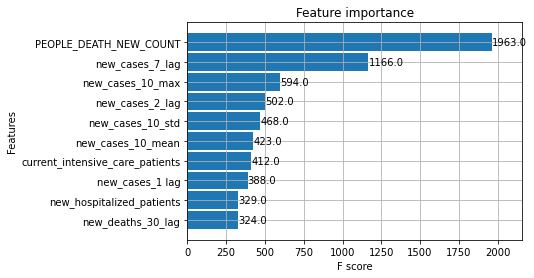

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

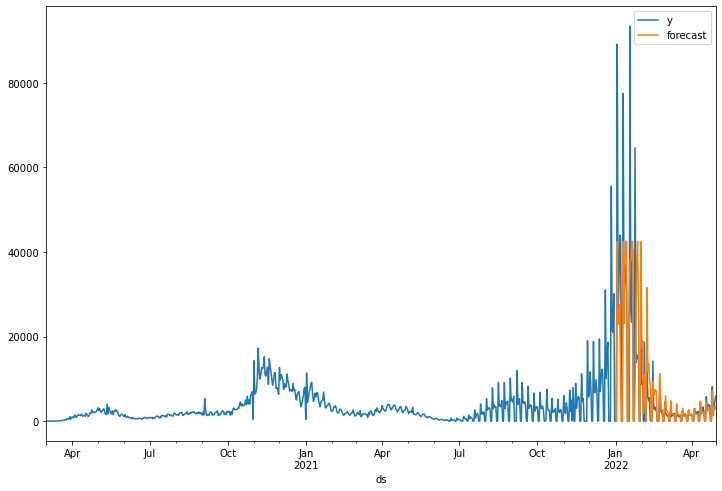

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

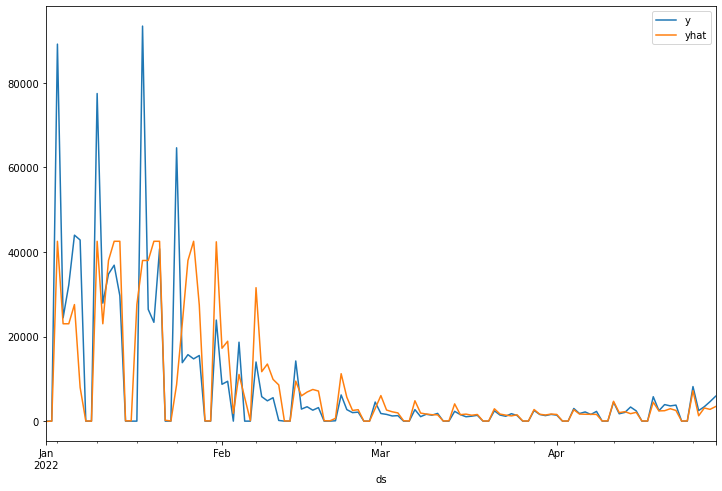

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  11393.834305020959
Test MAE:  4817.79969341815
MASE =  0.5729885833970911


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

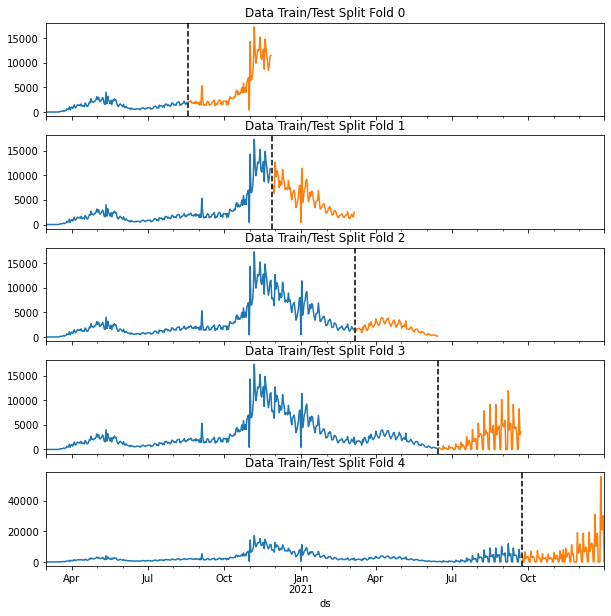

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[19:47:27] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5284.61784	validation_1-rmse:18774.67595
[100]	validation_0-rmse:2586.14953	validation_1-rmse:13674.28889
[200]	validation_0-rmse:1595.98474	validation_1-rmse:11729.33023
[300]	validation_0-rmse:1163.93246	validation_1-rmse:11369.93847
[323]	validation_0-rmse:1104.98637	validation_1-rmse:11375.19806
[19:47:27] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5284.61784	validation_1-rmse:18774.67595
[100]	validation_0-rmse:2586.14953	validation_1-rmse:13674.28889
[200]	validation_0-rmse:1595.98474	validation_1-rmse:11729.33023
[300]	validation_0-rmse:1163.93246	validation_1-rmse:11369.93847
[323]	validation_0-rmse:1104.98637	validation_1-rmse:11375.19806
[19:

<AxesSubplot:xlabel='ds'>

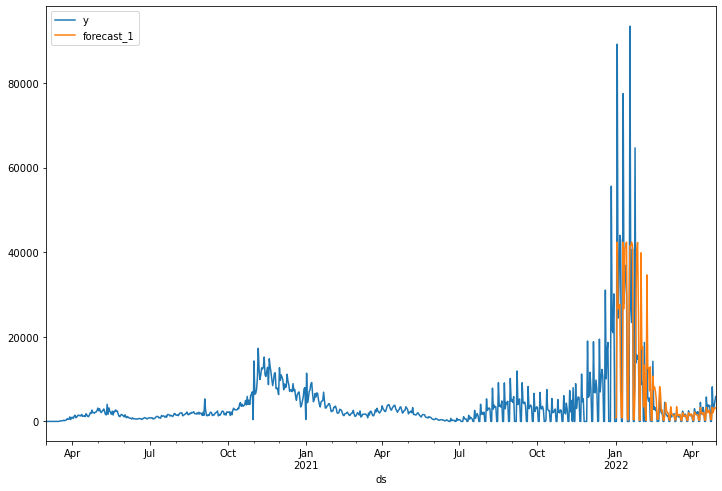

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

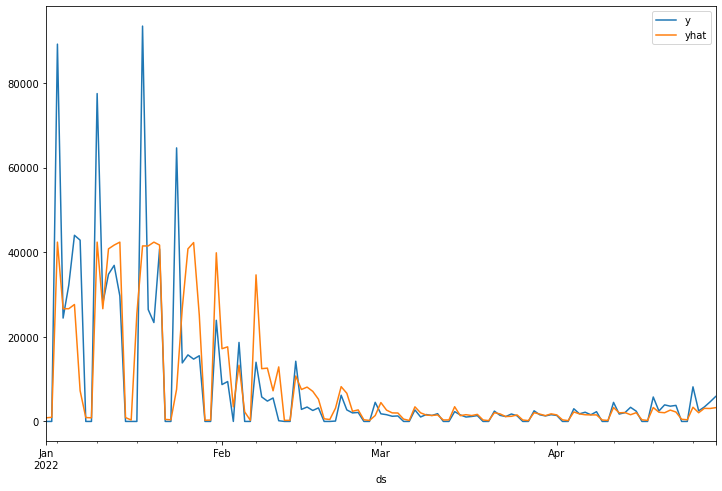

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  11393.834305020959
Test MAE:  4817.79969341815
MASE =  0.5729885833970911
